# Collecting the plots

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from numpy.fft import fft

# Potential energy curve

In [10]:
GL_00 = pd.read_csv('outputs/Energy_profile_00_GL.txt',sep='\s+',header=None)
GL_00 = pd.DataFrame(GL_00)
GL_002 = pd.read_csv('outputs/Energy_profile_002_GL.txt',sep='\s+',header=None)
GL_002 = pd.DataFrame(GL_002)
PZ_00 = pd.read_csv('outputs/Energy_profile_00_PZ.txt',sep='\s+',header=None)
PZ_00 = pd.DataFrame(PZ_00)
PZ_002 = pd.read_csv('outputs/Energy_profile_002_PZ.txt',sep='\s+',header=None)
PZ_002 = pd.DataFrame(PZ_002)
PW_00 = pd.read_csv('outputs/Energy_profile_00_PW.txt',sep='\s+',header=None)
PW_00 = pd.DataFrame(PW_00)
HF = pd.read_csv('outputs/Energy_profile_HF.txt',sep='\s+',header=None)
HF = pd.DataFrame(HF)

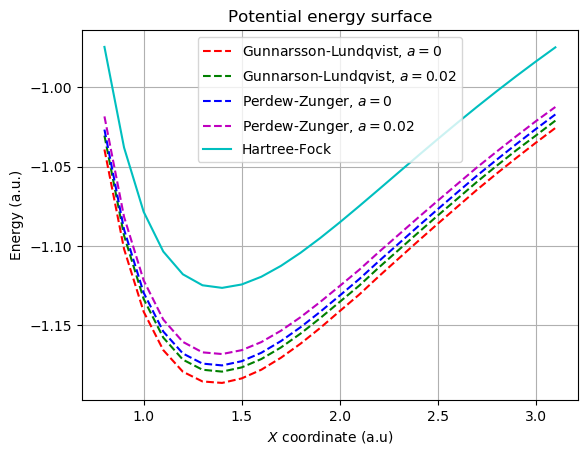

In [13]:
plt.plot(GL_00[0], GL_00[1],'r--', label='Gunnarsson-Lundqvist, $a=0$')
plt.plot(GL_002[0], GL_002[1],'g--', label='Gunnarson-Lundqvist, $a=0.02$')
plt.plot(PZ_00[0], PZ_00[1],'b--', label='Perdew-Zunger, $a=0$')
plt.plot(PZ_002[0], PZ_002[1],'m--', label='Perdew-Zunger, $a=0.02$')
plt.plot(HF[0], HF[1], 'c', label='Hartree-Fock')
plt.grid()
plt.title('Potential energy surface')
plt.xlabel(r'$X$ coordinate (a.u)')
plt.ylabel('Energy (a.u.)')
plt.legend(loc="best")
plt.savefig("outputs/pics/PES.png")

In [17]:
GL_01 = pd.read_csv('outputs/Energy_profile_01_GL.txt',sep='\s+',header=None)
GL_01 = pd.DataFrame(GL_01)
PZ_02 = pd.read_csv('outputs/Energy_profile_02_PZ.txt',sep='\s+',header=None)
PZ_02 = pd.DataFrame(PZ_02)

# Ensemble of trajectories

In [3]:

main_dataframe = pd.DataFrame(pd.read_csv(f'outputs/HF_traj/CPMD_HF_0.txt', sep='\s+',header=None))

for i in range(1, 20):
    df = pd.read_csv(f'outputs/HF_traj/CPMD_HF_{i}.txt', sep='\s+',header=None)
    df = pd.DataFrame(df)
    main_dataframe = pd.concat([main_dataframe, df],axis=1)
    N = len(main_dataframe[0])
    ts = 4.3*2.4188*1e-2
    times = np.arange(0, N*ts, ts)


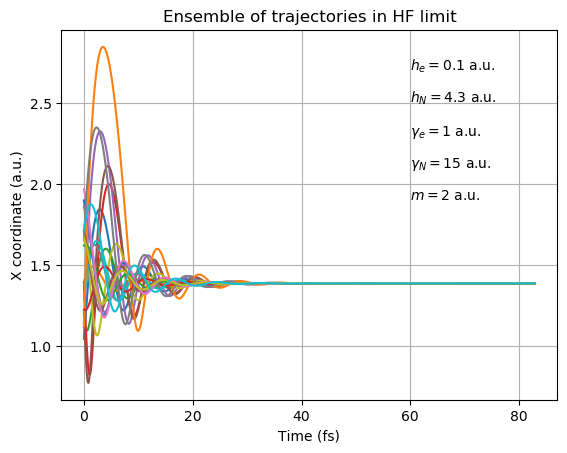

In [19]:
plt.plot(times, main_dataframe[0])
plt.title('Ensemble of trajectories in HF limit')
plt.xlabel('Time (fs)')
plt.grid()
plt.ylabel('X coordinate (a.u.)')
plt.text(60, 2.7, "$h_{e}=0.1$ a.u.")
plt.text(60, 2.5, "$h_{N}=4.3$ a.u.")
plt.text(60, 2.3, "$\gamma_{e}=1$ a.u.")
plt.text(60, 2.1, "$\gamma_{N}=15$ a.u.")
plt.text(60, 1.9, "$m=2$ a.u.")
plt.savefig("outputs/pics/traj.png")

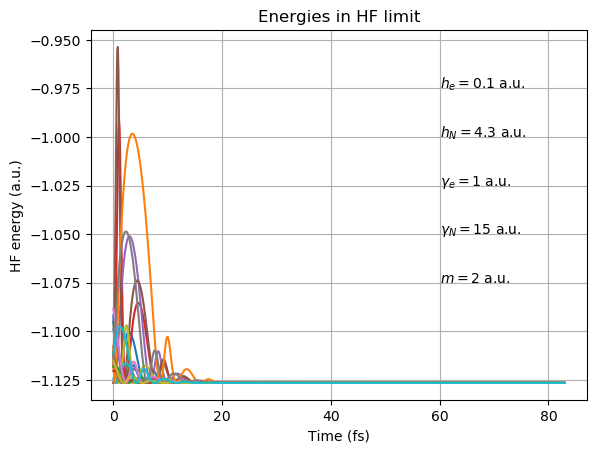

In [5]:
plt.plot(times, main_dataframe[1])
plt.title('Energies in HF limit')
plt.xlabel('Time (fs)')
plt.grid()
plt.ylabel('HF energy (a.u.)')
plt.text(60, -0.975, "$h_{e}=0.1$ a.u.")
plt.text(60, -1, "$h_{N}=4.3$ a.u.")
plt.text(60, -1.025, "$\gamma_{e}=1$ a.u.")
plt.text(60, -1.050, "$\gamma_{N}=15$ a.u.")
plt.text(60, -1.075, "$m=2$ a.u.")
plt.savefig("outputs/pics/HF_energies.png")


In [18]:
# Theoretical equilibrium distance:
0.528*1.42012

0.74982336

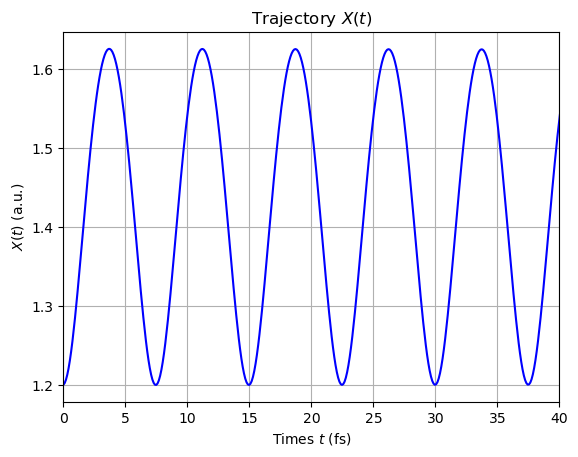

In [61]:
#Devo considerare soltanto un numero intero di periodi, quindi devo scartare la parte iniziale e finale. 

No_damping = pd.DataFrame(pd.read_csv('CPMD_HF_X_energies.txt', sep='\s+',header=None))
N = len(No_damping[0])
ts = 4.3*2.4188*1e-2
times = np.arange(0, N*ts, ts)
plt.plot(times, No_damping[0], 'b')
plt.grid()
plt.title(f"Trajectory $X(t)$")
plt.ylabel(f"$X(t)$ (a.u.)")
plt.xlabel(f"Times $t$ (fs)")
plt.xlim(0, 40)
plt.savefig("outputs/pics/No_damp.png")

In [25]:

def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N) #evenly spaced values within an interval 
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

In [85]:
N

798

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1082/923689714.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq[0:613], abs(Fourier[0:613]), 'r', \


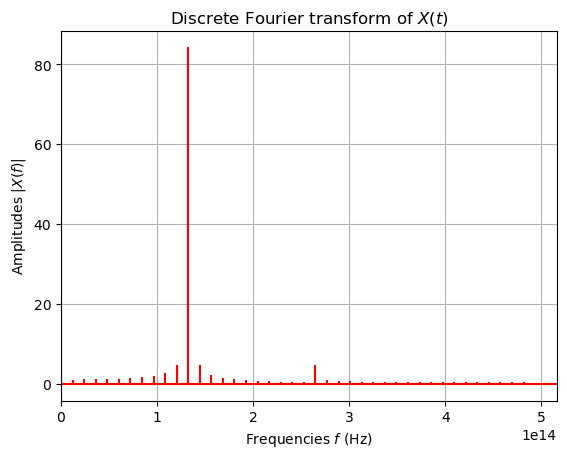

In [90]:

Fourier = DFT(No_damping[0] - np.mean(No_damping[0]))
plt.grid()
N = len(No_damping[0])
n = np.arange(N)
ts = 4.3
sr = 1/ts #Sampling rate 
T = N/sr
freq = 4.13*1e+16*n/T 
plt.stem(freq[0:613], abs(Fourier[0:613]), 'r', \
         markerfmt=" ", basefmt="-r")
plt.xlim(0, 0.0125*4.13*1e+16)
plt.title(f"Discrete Fourier transform of $X(t)$")
plt.ylabel(f"Amplitudes $|X(f)|$")
plt.xlabel(f"Frequencies $f$ (Hz)")
plt.savefig("outputs/pics/Fourier.png")


# Subplot with energies

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1082/2209258082.py:22: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(loc="best")


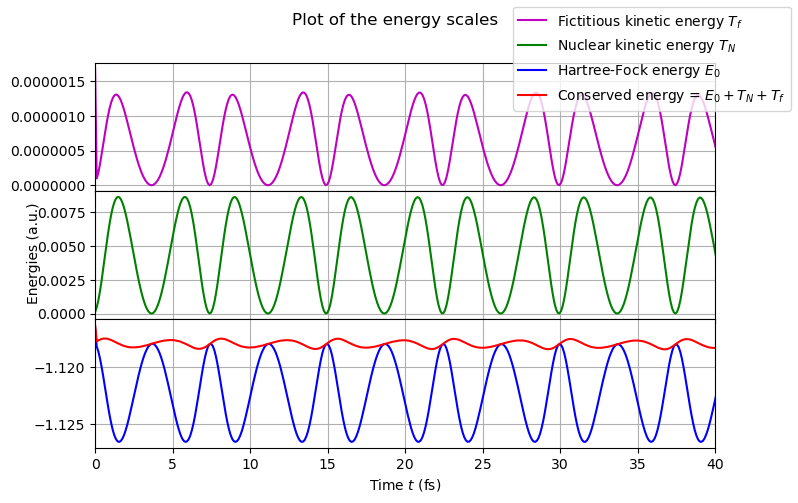

In [46]:
energies = pd.DataFrame(pd.read_csv(f'outputs/HF_traj/CPMD_HF_0.txt', sep='\s+',header=None))
N = len(energies[1])
ts = 4.3*2.4188*1e-2
times = np.arange(0, N*ts, ts)

fig, axs = plt.subplots(nrows=3, sharex=True, sharey=False)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

fig.suptitle('Plot of the energy scales')
axs[0].plot(times, energies[5], 'm', label=f'Fictitious kinetic energy $T_f$')
axs[0].grid()
axs[1].plot(times, energies[2], 'g', label=f'Nuclear kinetic energy $T_N$')
axs[1].grid()
axs[2].plot(times, energies[1], 'b', label=f'Hartree-Fock energy $E_0$')
axs[2].plot(times, energies[1] + energies[2] + energies[5], 'r', label=f'Conserved energy = $E_0 + T_N + T_f$')
plt.xlabel(f"Time $t$ (fs)")
axs[2].grid()
fig.text(0.04, 0.5, 'Energies (a.u.)', va='center', rotation='vertical')
fig.set_figheight(5)
fig.set_figwidth(8)
fig.legend(loc="best")
plt.xlim(0, 40)
plt.savefig("outputs/pics/E_scales_1.png")


# DFT with no damping

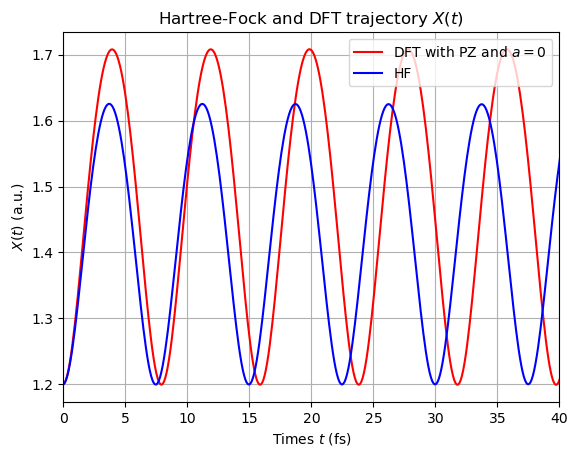

In [73]:
No_damping_DFT = pd.DataFrame(pd.read_csv(f'outputs/MD_CP_DFT_X_energies_freq_PZ.txt', sep='\s+',header=None))
N = len(No_damping_DFT[0])
ts = 4.3*2.4188*1e-2
times = np.arange(0, N*ts, ts)
plt.plot(times, No_damping_DFT[0], 'r', label=r'DFT with PZ and $a=0$')
plt.plot(times, No_damping[0][0:N], 'b', label='HF')
plt.legend(loc='upper right')
plt.grid()
plt.title(f"Hartree-Fock and DFT trajectory $X(t)$")
plt.ylabel(f"$X(t)$ (a.u.)")
plt.xlabel(f"Times $t$ (fs)")
plt.xlim(0, 40)
plt.savefig("outputs/pics/No_damp_DFT.png")

#Tieni presente che l'energia dovrebbe conservarsi, quindi ci sta che i minimi siano a circa 1.2

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1082/2230500492.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq_DFT, abs(Fourier_DFT), 'r', \
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1082/2230500492.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq[0:N], abs(Fourier[0:N]), 'b', \


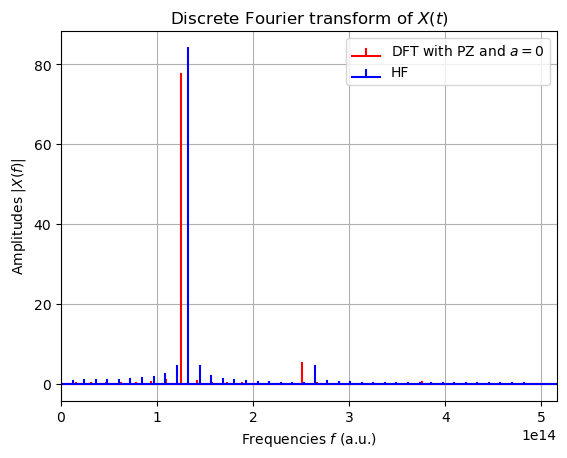

In [91]:
Fourier_DFT = DFT(No_damping_DFT[0] - np.mean(No_damping_DFT[0]))
plt.grid()
N = len(No_damping_DFT[0])
n = np.arange(N)
ts = 4.3
sr = 1/ts #Sampling rate 
T = N/sr
freq_DFT = 4.13*1e+16*n/T 
plt.stem(freq_DFT, abs(Fourier_DFT), 'r', \
         markerfmt=" ", basefmt="-r", label=r'DFT with PZ and $a=0$')
plt.stem(freq[0:N], abs(Fourier[0:N]), 'b', \
         markerfmt=" ", basefmt="-b", label='HF')
plt.xlim(0, 0.0125*4.13*1e+16)
plt.legend(loc='upper right')
plt.title(f"Discrete Fourier transform of $X(t)$")
plt.ylabel(f"Amplitudes $|X(f)|$")
plt.xlabel(f"Frequencies $f$ (a.u.)")
plt.savefig("outputs/pics/Fourier_DFT.png")

In [11]:
4.13*1e+16*8/(4.3*len(No_damping_DFT[0]))

125346181569862.28

In [7]:
np.argmax(abs(Fourier))

8

# DFT with damping

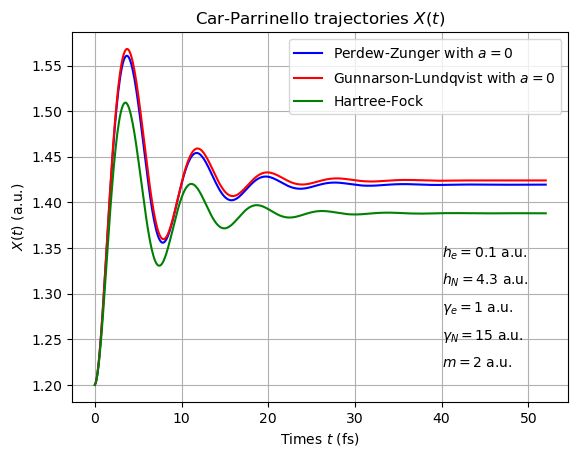

In [45]:
damping_DFT_PZ = pd.DataFrame(pd.read_csv(f'outputs/MD_CP_DFT_X_energies_PZ.txt', sep='\s+',header=None))
damping_DFT_GL = pd.DataFrame(pd.read_csv(f'outputs/MD_CP_DFT_X_energies_GL.txt', sep='\s+',header=None))
damping_HF = pd.DataFrame(pd.read_csv(f'CPMD_HF_X_energies.txt', sep='\s+',header=None))
N = len(damping_DFT_GL[0])
ts = 4.3*2.4188*1e-2
times = np.arange(0, N*ts, ts)
plt.plot(times, damping_DFT_PZ[0], 'b', label=r'Perdew-Zunger with $a=0$')
plt.plot(times, damping_DFT_GL[0], 'r', label=r'Gunnarson-Lundqvist with $a=0$')
plt.plot(times[0:N], damping_HF[0][0:N], 'g', label=r'Hartree-Fock')
plt.grid()
plt.legend(loc="best")
plt.title(f"Car-Parrinello trajectories $X(t)$")
plt.ylabel(f"$X(t)$ (a.u.)")
plt.xlabel(f"Times $t$ (fs)")
plt.text(40, 1.34, "$h_{e}=0.1$ a.u.")
plt.text(40, 1.31, "$h_{N}=4.3$ a.u.")
plt.text(40, 1.28, "$\gamma_{e}=1$ a.u.")
plt.text(40, 1.25, "$\gamma_{N}=15$ a.u.")
plt.text(40, 1.22, "$m=2$ a.u.")
plt.savefig("outputs/pics/damp_DFT.png")


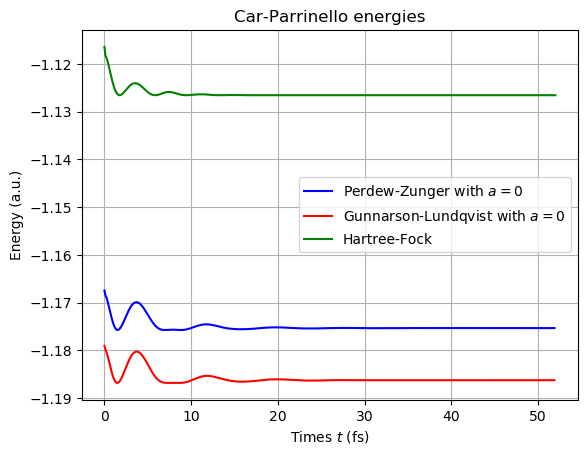

In [48]:
plt.plot(times, damping_DFT_PZ[1], 'b', label=r'Perdew-Zunger with $a=0$')
plt.plot(times, damping_DFT_GL[1], 'r', label=r'Gunnarson-Lundqvist with $a=0$')
plt.plot(times[0:N], damping_HF[1][0:N], 'g', label=r'Hartree-Fock')
plt.grid()
plt.legend(loc="best")
plt.title(f"Car-Parrinello energies")
plt.ylabel(f"Energy (a.u.)")
plt.xlabel(f"Times $t$ (fs)")
plt.savefig("outputs/pics/damp_DFT_energies.png")

# Density plot

In [3]:
density = pd.read_csv(f'outputs/density.txt', sep='\s+',header=None)
N_mesh = 100
rho_a = -1.7
rho_b = 1.7
h = (rho_b - rho_a)/N_mesh
rho = np.arange(rho_a, rho_b, h)
z_a = -2.0
z_b = 3.4
h = (z_b - z_a)/N_mesh
z = np.arange(z_a, z_b, h)
Z, RHO = meshgrid(z, rho) # grid of point

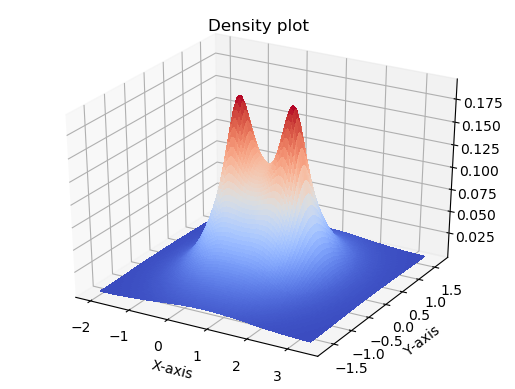

In [69]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Z, RHO, density, rstride=1, cstride=1, 
                      cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title("Density plot")
# Attenzione perché la densità va plottata per una configurazione di equilibrio. 
plt.savefig("outputs/pics/density.png")

# fig, ax = plt.subplots()
# im = plt.imshow(density)

# Car-Parrinello with DFT

In [ ]:
# Qui potrei mettere un confronto tra la traiettoria fatta con HF e una (o più) con DFT. 
# Dobbiamo ottenere anche le due energie cinetiche 

# Conjugate gradient molecular dynamics

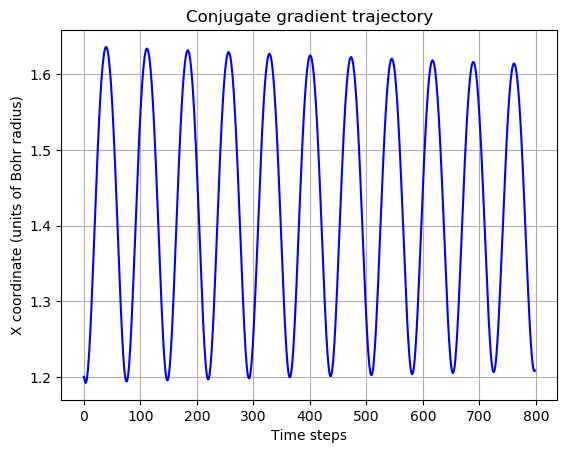

In [2]:
CG_HF = pd.read_csv(f'CGMD_HF_X_energies.txt', sep='\s+',header=None)
CG_HF = pd.DataFrame(CG_HF)
plt.plot(CG_HF[0], 'b')
plt.title('Conjugate gradient trajectory')
plt.xlabel('Time steps')
plt.grid()
plt.ylabel('X coordinate (units of Bohr radius)')
plt.savefig('outputs/pics/CG_HF_traj.png')

In [10]:
Fourier = np.fft.fft(CG_shake[0])

# extract real part
x = [ele.real for ele in Fourier]
# extract imaginary part
y = [ele.imag for ele in Fourier]

# Born-Oppenheimer molecular dynamics

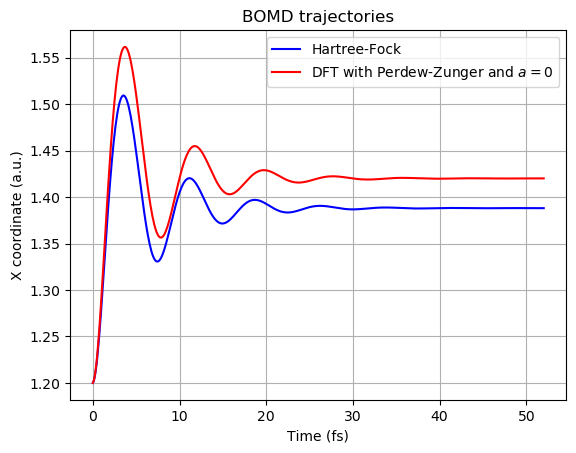

In [5]:
# HF and DFT plots superimposed. 

BO_HF = pd.read_csv(f'BOMD_HF_X_energies.txt', sep='\s+',header=None)
BO_HF = pd.DataFrame(BO_HF)
BO_DFT = pd.read_csv(f'BOMD_DFT_X_energies.txt', sep='\s+',header=None)
BO_DFT = pd.DataFrame(BO_DFT)

N = len(BO_DFT[0])
ts = 4.3*2.4188*1e-2
times = np.arange(0, N*ts, ts)

plt.plot(times, BO_HF[0][0:N], 'b', label='Hartree-Fock')
plt.plot(times, BO_DFT[0], 'r', label=r'DFT with Perdew-Zunger and $a=0$')
plt.title('BOMD trajectories')
plt.xlabel('Time (fs)')
plt.ylabel('X coordinate (a.u.)')
plt.grid()
plt.legend(loc="best")
plt.savefig("outputs/pics/BO_HF_DFT.png")

In [31]:
48*2.4188*1e-2

1.161024

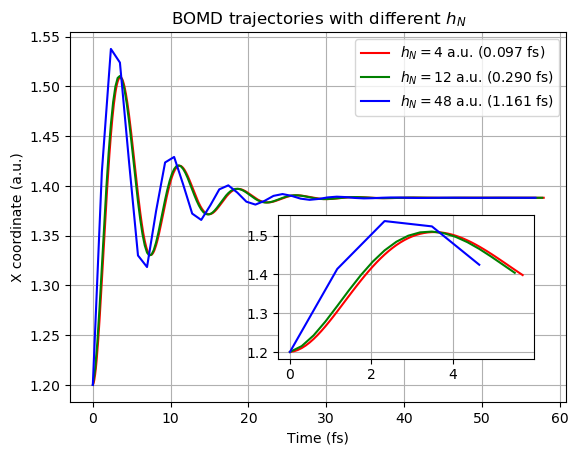

In [3]:
# BO plots for multiple time-steps
#Voglio plottare tutto nello stesso intervallo. 
BO_40 = pd.read_csv(f'multiple_time_steps/BOMD_HF_X_energies_40.txt', sep='\s+',header=None)
BO_40 = pd.DataFrame(BO_40[0:600])
BO_120 = pd.read_csv(f'multiple_time_steps/BOMD_HF_X_energies_120.txt', sep='\s+',header=None)
BO_120 = pd.DataFrame(BO_120[0:200])
BO_480 = pd.read_csv(f'multiple_time_steps/BOMD_HF_X_energies_480.txt', sep='\s+',header=None)
BO_480 = pd.DataFrame(BO_480[0:50])

N1 = 600
ts = 4*2.4188*1e-2
times1 = np.arange(0, N1*ts, ts)

N2 = N1/3
ts = 12*2.4188*1e-2
times2 = np.arange(0, N2*ts, ts)

N3 = N1/12
ts = 48*2.4188*1e-2
times3 = np.arange(0, N3*ts, ts)

plt.plot(times1, BO_40[0], 'r', label=r'$h_N=4$ a.u. (0.097 fs)')
plt.plot(times2, BO_120[0], 'g', label=r'$h_N=12$ a.u. (0.290 fs)')
plt.plot(times3, BO_480[0], 'b', label=r'$h_N=48$ a.u. (1.161 fs)')
plt.grid()
plt.xlabel('Time (fs)')
plt.ylabel('X coordinate (a.u.)')
plt.legend(loc="best")
plt.title(r'BOMD trajectories with different $h_N$')


#subplot 
sub_axes = plt.axes([.45, .2, .4, .3]) 
sub_axes.plot(times1[0:60], BO_40[0][0:60], 'r')
sub_axes.plot(times2[0:20], BO_120[0][0:20], 'g')
sub_axes.plot(times3[0:5], BO_480[0][0:5], 'b')
sub_axes.grid()

plt.savefig("outputs/pics/three_times.png")

# Force plot with multiple masses 

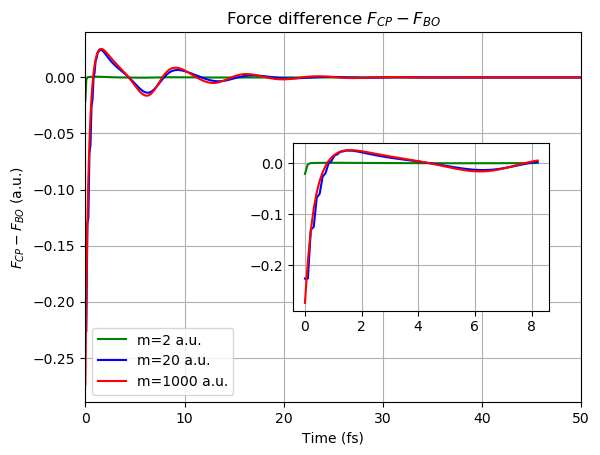

In [43]:
BO_HF = pd.DataFrame(pd.read_csv(f'BOMD_HF_X_energies.txt', sep='\s+',header=None))
CP_HF_m2 = pd.DataFrame(pd.read_csv(f'multiple_masses/CPMD_HF_X_energies_m2.txt', sep='\s+',header=None))
CP_HF_m20 = pd.DataFrame(pd.read_csv(f'multiple_masses/CPMD_HF_X_energies_m20.txt', sep='\s+',header=None))
CP_HF_m1000 = pd.DataFrame(pd.read_csv(f'multiple_masses/CPMD_HF_X_energies_m1000.txt', sep='\s+',header=None))
N = len(BO_HF[0])
ts = 4.3*2.4188*1e-2
times = np.arange(0, N*ts, ts)
plt.plot(times, CP_HF_m2[6] - BO_HF[5], 'g', label='m=2 a.u.')
plt.plot(times, CP_HF_m20[6] - BO_HF[5], 'b', label='m=20 a.u.')
plt.plot(times, CP_HF_m1000[6] - BO_HF[5], 'r', label='m=1000 a.u.')
plt.xlim(0, 50)
plt.grid()
plt.legend(loc="best")
plt.xlabel('Time (fs)')
plt.ylabel(r'$F_{CP}-F_{BO}$ (a.u.)')
plt.title(r"Force difference $F_{CP}-F_{BO}$")


#subplot 
sub_axes = plt.axes([.45, .3, .4, .35]) 
n = 80
plt.plot(times[0:n], CP_HF_m2[6][0:n] - BO_HF[5][0:n], 'g')
plt.plot(times[0:n], CP_HF_m20[6][0:n] - BO_HF[5][0:n], 'b')
plt.plot(times[0:n], CP_HF_m1000[6][0:n] - BO_HF[5][0:n], 'r')
sub_axes.grid()

plt.savefig("outputs/pics/Force_diff.png")


In [14]:
CP_HF[6] - BO_HF[5]

0     -0.021066
1     -0.002010
2      0.000075
3      0.000316
4      0.000422
         ...   
793    0.000000
794    0.000000
795    0.000000
796    0.000000
797    0.000000
Length: 798, dtype: float64

# X versus correlation energy

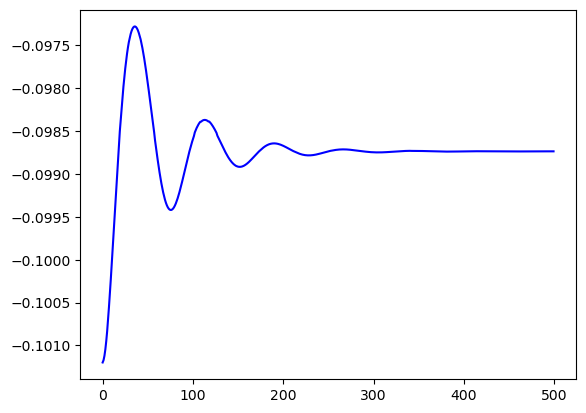

In [53]:
BO_DFT = pd.read_csv(f'BOMD_DFT_X_energies.txt', sep='\s+',header=None)
BO_DFT = pd.DataFrame(BO_DFT)
plt.plot(BO_DFT[5], 'b')

# CP energy in single step

In [4]:
C0 = pd.DataFrame(pd.read_csv(f'multiple_gamma/Energies_C_evolution_0.txt', sep='\s+',header=None))
C1 = pd.DataFrame(pd.read_csv(f'multiple_gamma/Energies_C_evolution_1.txt', sep='\s+',header=None))
C2 = pd.DataFrame(pd.read_csv(f'multiple_gamma/Energies_C_evolution_2.txt', sep='\s+',header=None))
C4 = pd.DataFrame(pd.read_csv(f'multiple_gamma/Energies_C_evolution_4.txt', sep='\s+',header=None))

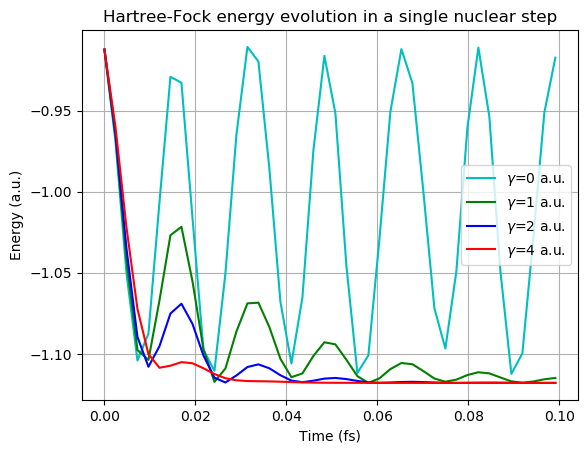

In [9]:
N = len(C1[0])
ts = 0.1*2.4188*1e-2
times = np.arange(0, N*ts, ts)
plt.plot(times, C0[0], 'c', label='$\gamma$=0 a.u.')
plt.plot(times, C1[0], 'g', label='$\gamma$=1 a.u.')
plt.plot(times, C2[0], 'b', label='$\gamma$=2 a.u.')
plt.plot(times, C4[0], 'r', label='$\gamma$=4 a.u.')
plt.grid()
plt.legend(loc="best")
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.title("Hartree-Fock energy evolution in a single nuclear step")
plt.savefig("outputs/pics/single_step_energies.png")

In [6]:
CP0 = pd.DataFrame(pd.read_csv(f'multiple_gamma/CPMD_HF_X_energies_0.txt', sep='\s+',header=None))
CP1 = pd.DataFrame(pd.read_csv(f'multiple_gamma/CPMD_HF_X_energies_1.txt', sep='\s+',header=None))
CP2 = pd.DataFrame(pd.read_csv(f'multiple_gamma/CPMD_HF_X_energies_2.txt', sep='\s+',header=None))
CP4 = pd.DataFrame(pd.read_csv(f'multiple_gamma/CPMD_HF_X_energies_4.txt', sep='\s+',header=None))

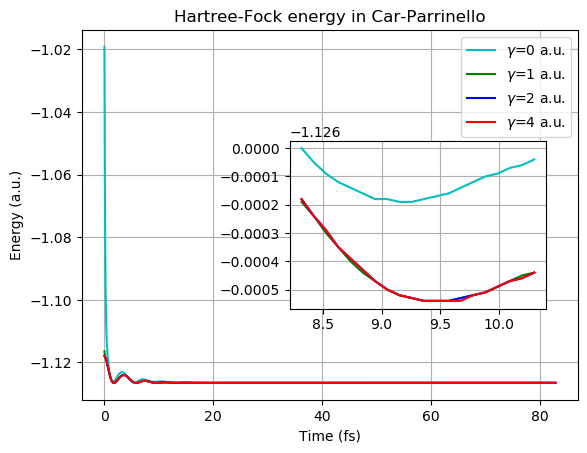

In [10]:
N = len(CP1[0])
ts = 4.3*2.4188*1e-2
times = np.arange(0, N*ts, ts)
plt.plot(times, CP0[1], 'c', label='$\gamma$=0 a.u.')
plt.plot(times, CP1[1], 'g', label='$\gamma$=1 a.u.')
plt.plot(times, CP2[1], 'b', label='$\gamma$=2 a.u.')
plt.plot(times, CP4[1], 'r', label='$\gamma$=4 a.u.')
plt.grid()
plt.legend(loc="best")
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.title('Hartree-Fock energy in Car-Parrinello')

#subplot 
sub_axes = plt.axes([.45, .3, .4, .35])
d = 80
n = 100
plt.plot(times[d:n], CP0[1][d:n], 'c')
plt.plot(times[d:n], CP1[1][d:n], 'g')
plt.plot(times[d:n], CP2[1][d:n], 'b')
plt.plot(times[d:n], CP4[1][d:n], 'r')
sub_axes.grid()

plt.savefig("outputs/pics/tot_energies.png")

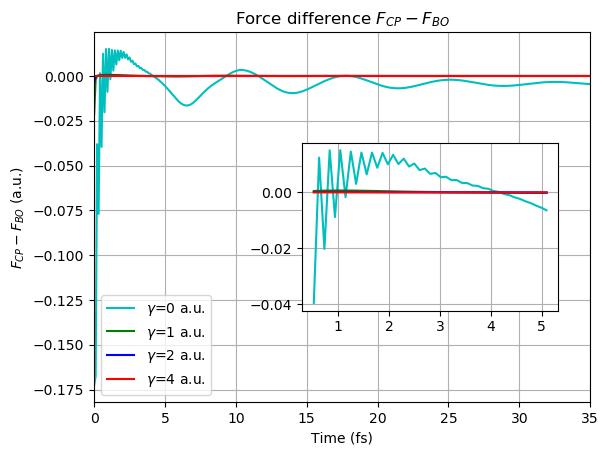

In [23]:
BO_HF = pd.DataFrame(pd.read_csv(f'BOMD_HF_X_energies.txt', sep='\s+',header=None))
N = len(CP1[0])
ts = 4.3*2.4188*1e-2
times = np.arange(0, N*ts, ts)
plt.plot(times, CP0[6] - BO_HF[5], 'c', label='$\gamma$=0 a.u.')
plt.plot(times, CP1[6] - BO_HF[5], 'g', label='$\gamma$=1 a.u.')
plt.plot(times, CP2[6] - BO_HF[5], 'b', label='$\gamma$=2 a.u.')
plt.plot(times, CP4[6] - BO_HF[5], 'r', label='$\gamma$=4 a.u.')
plt.grid()
plt.xlim(0, 35)
plt.legend(loc="best")
plt.xlabel('Time (fs)')
plt.ylabel(r'$F_{CP}-F_{BO}$ (a.u.)')
plt.title(r"Force difference $F_{CP}-F_{BO}$")

#subplot 
sub_axes = plt.axes([.45, .3, .4, .35])
d = 5
n = 50
plt.plot(times[d:n], CP0[6][d:n] - BO_HF[5][d:n], 'c')
plt.plot(times[d:n], CP1[6][d:n] - BO_HF[5][d:n], 'g')
plt.plot(times[d:n], CP2[6][d:n] - BO_HF[5][d:n], 'b')
plt.plot(times[d:n], CP4[6][d:n] - BO_HF[5][d:n], 'r')
sub_axes.grid()

plt.savefig("outputs/pics/F_diff_gamma.png")


# Comparison of BO, CP and CG

In [34]:
BO = pd.DataFrame(pd.read_csv(f'BOMD_DFT_X_energies.txt', sep='\s+',header=None))
CG = pd.DataFrame(pd.read_csv(f'CGMD_DFT_X_energies.txt', sep='\s+',header=None))
CP = pd.DataFrame(pd.read_csv(f'outputs/MD_CP_DFT_X_energies_PZ.txt', sep='\s+',header=None))

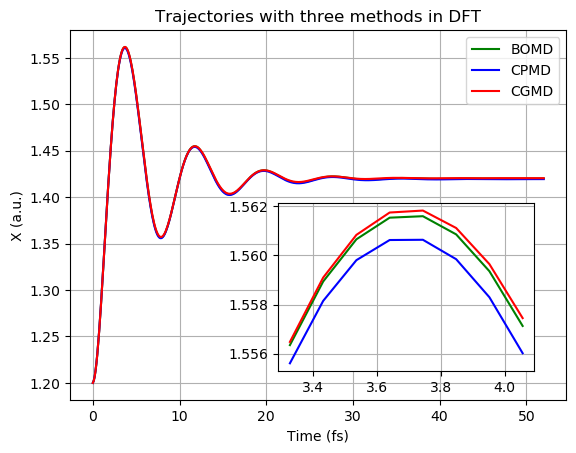

In [37]:
# anche qua ci sta un ingrandimento...
N = len(CP[0])
ts = 4.3*2.4188*1e-2
times = np.arange(0, N*ts, ts)
plt.plot(times, BO[0], 'g', label='BOMD')
plt.plot(times, CP[0], 'b', label='CPMD')
plt.plot(times, CG[0], 'r', label='CGMD')
plt.grid()
plt.legend(loc='best')
plt.title('Trajectories with three methods in DFT')
plt.xlabel('Time (fs)')
plt.ylabel('X (a.u.)')

#subplot 
sub_axes = plt.axes([.45, 0.17, .4, .35])
d = 32
n = 40
plt.plot(times[d:n], BO[0][d:n], 'g')
plt.plot(times[d:n], CP[0][d:n], 'b')
plt.plot(times[d:n], CG[0][d:n], 'r')
sub_axes.grid()

plt.savefig("outputs/pics/CG_BO_CP.png")


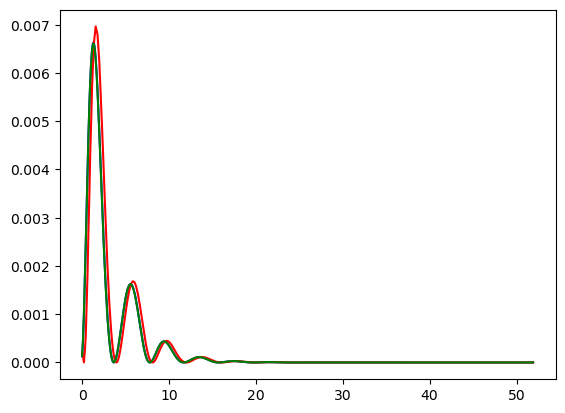

In [16]:
plt.plot(times, 0.5*BO[2], 'b')
plt.plot(times, 0.5*CG[2], 'r')
plt.plot(times, CP[2], 'g')

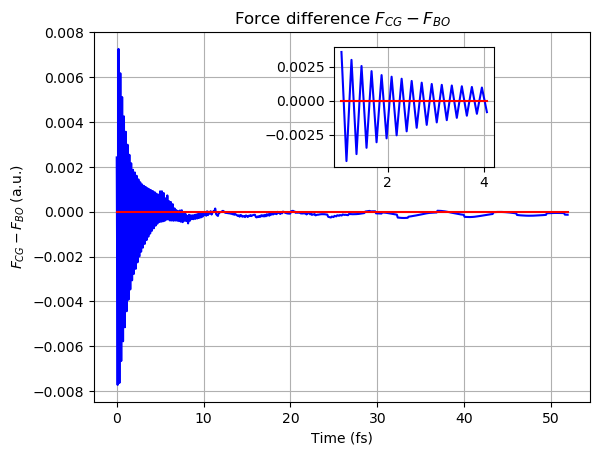

In [43]:
# Differenza tra le forze 

plt.plot(times, BO[6]-CG[6], 'b')
plt.plot(times, BO[6]-BO[6], 'r')
plt.grid()
plt.xlabel('Time (fs)')
plt.ylabel(r'$F_{CG}-F_{BO}$ (a.u.)')
plt.title(r"Force difference $F_{CG}-F_{BO}$")

#subplot 
sub_axes = plt.axes([.5, 0.6, .25, .25])
d = 10
n = 40
plt.plot(times[d:n], BO[6][d:n]-CG[6][d:n], 'b')
plt.plot(times[d:n], BO[6][d:n]-BO[6][d:n], 'r')
sub_axes.grid()

plt.savefig("outputs/pics/force_diff_CG.png")